<a href="https://colab.research.google.com/github/changsin/MIU_ML/blob/main/notebooks/04.logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Logistic regression



# Sample dataset:
 [sklearn diabetes](https://scikit-learn.org/stable/datasets/toy_dataset.html)

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

## X column attributes:
1. radius (mean of distances from center to points on the perimeter)
2. texture (standard deviation of gray-scale values)
3. perimeter
4. area
5. smoothness (local variation in radius lengths)
6. compactness (perimeter^2 / area - 1.0)
7. concavity (severity of concave portions of the contour)
8. concave points (number of concave portions of the contour)
9. symmetry
10. fractal dimension (“coastline approximation” - 1)

(mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).

## y target value:
  1: malignant (212) 0: benign (357)

In [ ]:
!git clone https://github.com/changsin/ML

Cloning into 'ML'...
remote: Enumerating objects: 50, done.
remote: Counting objects: 100% (50/50), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 50 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (50/50), done.


In [ ]:
from sklearn import datasets

X, y = datasets.load_breast_cancer(return_X_y=True)

X.shape

(569, 30)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_data(X, y):
  positives = X[y == 1]
  negatives = X[y == 0]

  fig, ax = plt.subplots()
  ax.plot(positives[:, 0], positives[:, 1], marker='o', linestyle='', ms=12, label='+')
  ax.plot(negatives[:, 0], negatives[:, 1], marker='o', linestyle='', ms=12, label='-')

  plt.legend()

  return ax

## Plot tumor size vs. malignant

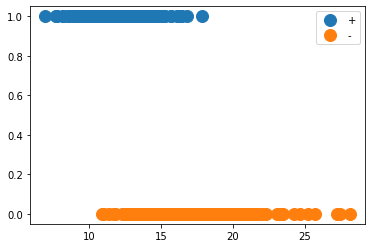

In [ ]:
data = np.stack((X[:, 0], y), axis=1)

plot_data(data, y)

## Plot tumor size and texture

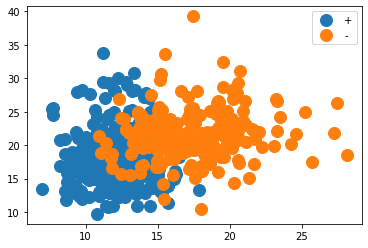

In [ ]:
data = np.stack((X[:, 0], X[:, 1]), axis=1)

ax = plot_data(data, y)

In [ ]:

from sklearn.linear_model import LogisticRegression

model_logistic_regression = LogisticRegression()
model_logistic_regression.fit(X[:, :2], y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:

errors = np.sum(y != model_logistic_regression.predict(X[:, :2]))
total = y.shape[0]
accurate = total - errors
print("Accuracy: {:.02f} ({}/{})".format((total - errors)/total, accurate, total))

Accuracy: 0.89 (507/569)
